Importar bibliotecas

In [18]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from IPython.display import display


In [19]:
# Obter os dados da ação da Apple
stock = yf.Ticker("AAPL")
data = stock.history(period='max')

# Obter os dividendos pagos
dividends = stock.dividends

# Converter os índices para um formato tz-naive (sem fuso horário)
dividends.index = dividends.index.tz_localize(None)

# Filtrar os dividendos para os últimos 5 anos
end_date = pd.Timestamp.today().normalize()
start_date = end_date - pd.DateOffset(years=5)
dividends_last_5_years = dividends.loc[start_date:end_date]

# Resample para calcular a média anual
annual_dividends = dividends_last_5_years.resample('YE').mean()  # 'YE' é a forma recomendada para frequência anual

# Converter para DataFrame e formatar as colunas
annual_dividends_df = annual_dividends.reset_index()
annual_dividends_df.columns = ['Ano', 'Média de Dividendos']

# Formatar o ano como string para o cabeçalho
annual_dividends_df['Ano'] = annual_dividends_df['Ano'].dt.year.astype(str)

# Calcular a média geral dos dividendos
average_dividend = annual_dividends.mean()

# Adicionar a média geral como uma nova coluna
annual_dividends_df['Média Geral'] = average_dividend

# Pivotar para ter anos como colunas e incluir a média geral
pivot_df = annual_dividends_df.pivot_table(index=[], columns='Ano', values='Média de Dividendos', aggfunc='mean')
pivot_df['Média Geral'] = annual_dividends_df['Média Geral'].values[0]

# Formatar os valores para duas casas decimais
pivot_df = pivot_df.round(2)

# Exibir o resultado usando display
display(pivot_df)


Ano,2019,2020,2021,2022,2023,2024,Média Geral
Média de Dividendos,0.19,0.2,0.22,0.23,0.24,0.25,0.22


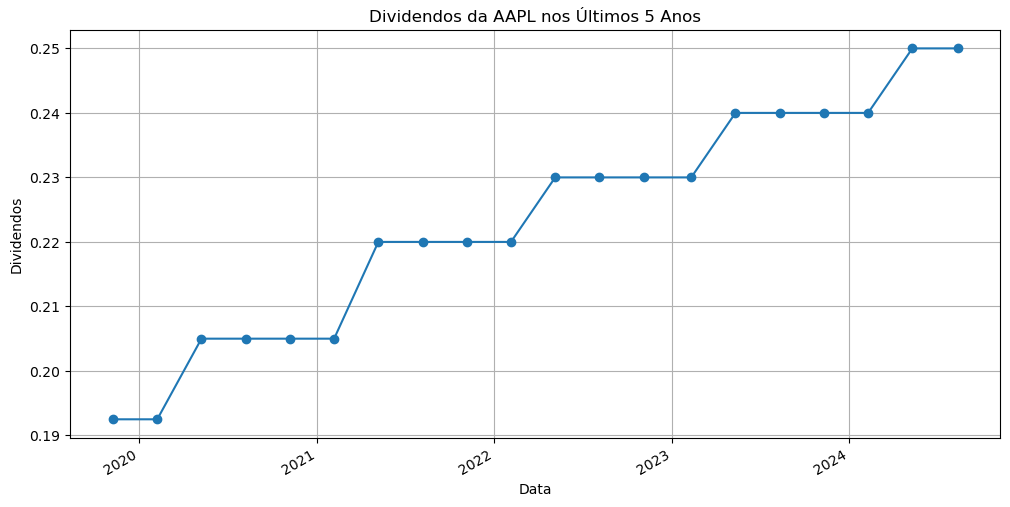

In [22]:

# Plotar os dividendos dos últimos 5 anos
plt.figure(figsize=(12, 6))
dividends_last_5_years.plot(title='Dividendos da AAPL nos Últimos 5 Anos', ylabel='Dividendos', xlabel='Data', linestyle='-', marker='o')
plt.grid(True)
plt.show()